In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.image as mpimg
import os
import math

In [2]:
!python detect.py --source runs\train\exp2\1_3.jpg  --weights runs\train\exp2\weights\best.pt --save-crop

detect: weights=['runs\\train\\exp2\\weights\\best.pt'], source=runs\train\exp2\1_3.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'D:\WIngify\Interview': No such file or directory
YOLOv5  2022-6-18 Python-3.9.12 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients
image 1/1 D:\WIngify\Interview Project\Images for Yolo\yolov5\runs\train\exp2\1_3.jpg: 448x640 1 Apple, 1 Finger, Done. (0.201s)
Speed: 0.0ms pre-process, 201.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


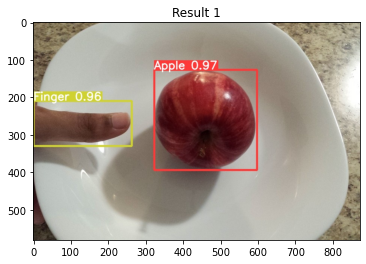

In [3]:
Result_1 = 'runs/detect/exp/1_3.jpg'
im_cv = cv2.imread(Result_1)
im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.title('Result 1')
plt.show()

In [4]:
!python detect.py --source runs\train\exp2\1_5.jpg  --weights runs\train\exp2\weights\best.pt --save-crop

detect: weights=['runs\\train\\exp2\\weights\\best.pt'], source=runs\train\exp2\1_5.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'D:\WIngify\Interview': No such file or directory
YOLOv5  2022-6-18 Python-3.9.12 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients
image 1/1 D:\WIngify\Interview Project\Images for Yolo\yolov5\runs\train\exp2\1_5.jpg: 480x640 1 Apple, 1 Finger, Done. (0.236s)
Speed: 1.0ms pre-process, 236.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp4


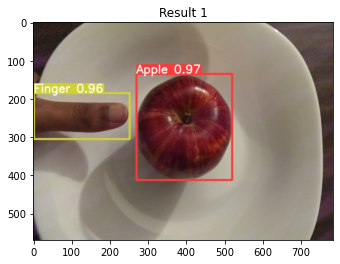

In [5]:
Result_2 = 'runs/detect/exp2/1_5.jpg'
im_cv = cv2.imread(Result_2)
im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.title('Result 1')
plt.show()

In [6]:
import os
names = os.listdir("D:/WIngify/Interview Project/Images for Yolo/yolov5/runs/detect/exp/crops/")
names_1 = os.listdir("D:/WIngify/Interview Project/Images for Yolo/yolov5/runs/detect/exp2/crops/")

In [7]:
names_1

['Apple', 'Finger']

In [8]:
def getAreaOfFood(img1):
    data=os.path.join(os.getcwd(),"images_fruit")
    if os.path.exists(data):
        print('folder exist for images at ',data)
    else:
        os.mkdir(data)
        print('folder created for images at ',data)
        
    cv2.imwrite('{}\\1 original image.jpg'.format(data),img1)
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\2 original image BGR2GRAY.jpg'.format(data),img)
    img_filt = cv2.medianBlur( img, 5)
    cv2.imwrite('{}\\3 img_filt.jpg'.format(data),img_filt)
    img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)
    cv2.imwrite('{}\\4 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #make change here


	# find contours. sort. and find the biggest contour. the biggest contour corresponds to the plate and fruit.
    mask = np.zeros(img.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    cv2.imwrite('{}\\5 mask.jpg'.format(data),mask)
    img_bigcontour = cv2.bitwise_and(img1,img1,mask = mask)
    cv2.imwrite('{}\\6 img_bigcontour.jpg'.format(data),img_bigcontour)

	# convert to hsv. otsu threshold in s to remove plate
    hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\7 hsv_img.jpg'.format(data),hsv_img)
    h,s,v = cv2.split(hsv_img)
    mask_plate = cv2.inRange(hsv_img, np.array([0,0,50]), np.array([200,90,250]))
    cv2.imwrite('{}\\8 mask_plate.jpg'.format(data),mask_plate)
    mask_not_plate = cv2.bitwise_not(mask_plate)
    cv2.imwrite('{}\\9 mask_not_plate.jpg'.format(data),mask_not_plate)
    fruit_skin = cv2.bitwise_and(img_bigcontour,img_bigcontour,mask = mask_not_plate)
    cv2.imwrite('{}\\10 fruit_skin.jpg'.format(data),fruit_skin)

	#convert to hsv to detect and remove skin pixels
    hsv_img = cv2.cvtColor(fruit_skin, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\11 hsv_img.jpg'.format(data),hsv_img)
    skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([20,150,255])) #Scalar(0, 10, 60), Scalar(20, 150, 255)
    cv2.imwrite('{}\\12 coin.jpg'.format(data),skin)
    not_skin = cv2.bitwise_not(skin); #invert skin and black
    cv2.imwrite('{}\\13 not_coin.jpg'.format(data),not_skin)
    fruit = cv2.bitwise_and(fruit_skin,fruit_skin,mask = not_skin) #get only fruit pixels
    cv2.imwrite('{}\\14 fruit.jpg'.format(data),fruit)
    
    fruit_bw = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\15 fruit_bw.jpg'.format(data),fruit_bw)
    fruit_bin = cv2.inRange(fruit_bw, 10, 255) #binary of fruit
    cv2.imwrite('{}\\16 fruit_bw.jpg'.format(data),fruit_bin)

	#erode before finding contours
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    erode_fruit = cv2.erode(fruit_bin,kernel,iterations = 1)
    cv2.imwrite('{}\\17 erode_fruit.jpg'.format(data),erode_fruit)

	#find largest contour since that will be the fruit
    img_th = cv2.adaptiveThreshold(erode_fruit,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\18 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_fruit = np.zeros(fruit_bin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask_fruit, [largest_areas[-2]], 0, (255,255,255), -1)
    cv2.imwrite('{}\\19 mask_fruit.jpg'.format(data),mask_fruit)

	#dilate now
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask_fruit2 = cv2.dilate(mask_fruit,kernel2,iterations = 1)
    cv2.imwrite('{}\\20 mask_fruit2.jpg'.format(data),mask_fruit2)

    
	#find area of fruit
    contours, hierarchy = cv2.findContours(mask_fruit2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    fruit_contour = largest_areas[-1]
    fruit_area = cv2.contourArea(fruit_contour)
    fruit_rect = cv2.minAreaRect(largest_areas[-1])
    box = cv2.boxPoints(fruit_rect)
    box = np.int0(box)
    mask_skin2 = np.zeros(skin.shape, np.uint8)
    cv2.drawContours(mask_skin2,[box],0,(255,255,255), -1)
    cv2.imwrite('{}\\27 rect_fruit.jpg'.format(data),mask_skin2)
    pix_height = max(fruit_rect[1])
    pix_bredth = max(fruit_rect[0])
    
    
    return pix_bredth,pix_height

In [9]:
def Pix_to_cm(img1):
    data=os.path.join(os.getcwd(),"images_top")
    if os.path.exists(data):
        print('folder exist for images at ',data)
    else:
        os.mkdir(data)
        print('folder created for images at ',data)
        
    cv2.imwrite('{}\\1 original image.jpg'.format(data),img1)
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\2 original image BGR2GRAY.jpg'.format(data),img)
    img_filt = cv2.medianBlur( img, 5)
    cv2.imwrite('{}\\3 img_filt.jpg'.format(data),img_filt)
    img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)
    cv2.imwrite('{}\\4 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #make change here


	# find contours. sort. and find the biggest contour. the biggest contour corresponds to the plate and fruit.
    mask = np.zeros(img.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    cv2.imwrite('{}\\5 mask.jpg'.format(data),mask)
    img_bigcontour = cv2.bitwise_and(img1,img1,mask = mask)
    cv2.imwrite('{}\\6 img_bigcontour.jpg'.format(data),img_bigcontour)

	# convert to hsv. otsu threshold in s to remove plate
    hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\7 hsv_img.jpg'.format(data),hsv_img)
    h,s,v = cv2.split(hsv_img)
    mask_plate = cv2.inRange(hsv_img, np.array([0,0,50]), np.array([200,90,250]))
    cv2.imwrite('{}\\8 mask_plate.jpg'.format(data),mask_plate)
    mask_not_plate = cv2.bitwise_not(mask_plate)
    cv2.imwrite('{}\\9 mask_not_plate.jpg'.format(data),mask_not_plate)
    fruit_skin = cv2.bitwise_and(img_bigcontour,img_bigcontour,mask = mask_not_plate)
    cv2.imwrite('{}\\10 fruit_skin.jpg'.format(data),fruit_skin)

	#convert to hsv to detect and remove skin pixels
    hsv_img = cv2.cvtColor(fruit_skin, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\11 hsv_img.jpg'.format(data),hsv_img)
    skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([20,150,255])) #Scalar(0, 10, 60), Scalar(20, 150, 255)
    cv2.imwrite('{}\\12 coin.jpg'.format(data),skin)
    not_skin = cv2.bitwise_not(skin); #invert skin and black
    cv2.imwrite('{}\\13 not_coin.jpg'.format(data),not_skin)
    fruit = cv2.bitwise_and(fruit_skin,fruit_skin,mask = not_skin) #get only fruit pixels
    cv2.imwrite('{}\\14 fruit.jpg'.format(data),fruit)
    
    fruit_bw = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\15 fruit_bw.jpg'.format(data),fruit_bw)
    fruit_bin = cv2.inRange(fruit_bw, 10, 255) #binary of fruit
    cv2.imwrite('{}\\16 fruit_bw.jpg'.format(data),fruit_bin)

	#erode before finding contours
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    erode_fruit = cv2.erode(fruit_bin,kernel,iterations = 1)
    cv2.imwrite('{}\\17 erode_fruit.jpg'.format(data),erode_fruit)

	#find largest contour since that will be the fruit
    img_th = cv2.adaptiveThreshold(erode_fruit,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\18 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_fruit = np.zeros(fruit_bin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask_fruit, [largest_areas[-2]], 0, (255,255,255), -1)
    cv2.imwrite('{}\\19 mask_fruit.jpg'.format(data),mask_fruit)

	#dilate now
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask_fruit2 = cv2.dilate(mask_fruit,kernel2,iterations = 1)
    cv2.imwrite('{}\\20 mask_fruit2.jpg'.format(data),mask_fruit2)
    fruit_final = cv2.bitwise_and(img1,img1,mask = mask_fruit2)
    cv2.imwrite('{}\\21 fruit_final.jpg'.format(data),fruit_final)
    
	#find area of fruit
    img_th = cv2.adaptiveThreshold(mask_fruit2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\22 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    fruit_contour = largest_areas[-2]
    fruit_area = cv2.contourArea(fruit_contour)

	
	#finding the area of skin. find area of biggest contour
    skin2 = skin - mask_fruit2
    cv2.imwrite('{}\\23 skin2.jpg'.format(data),skin2)
    contours, hierarchy = cv2.findContours(skin2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_skin = np.zeros(skin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask_skin, [largest_areas[-1]], 0, (255,255,255), -1)
    cv2.imwrite('{}\\26 mask_skin.jpg'.format(data),mask_skin)
    
    
    skin_rect = cv2.minAreaRect(largest_areas[-1])
    box = cv2.boxPoints(skin_rect)
    box = np.int0(box)
    mask_skin2 = np.zeros(skin.shape, np.uint8)
    cv2.drawContours(mask_skin2,[box],0,(255,255,255), -1)
    cv2.imwrite('{}\\27 mask_skin2.jpg'.format(data),mask_skin2)
    
    pix_height = max(skin_rect[1])
    pix_bredth = max(skin_rect[0])
    pix_to_cm_multiplier= 5/pix_height
    skin_area = cv2.contourArea(box)
    
    return pix_to_cm_multiplier

In [10]:
DIR_f1  = 'D:/WIngify/Interview Project/Images for Yolo/yolov5/runs/detect/exp/crops/Finger/1_3.jpg'

cv2_img_f1 = cv2.imread(DIR_f1)
pix_to_cm1= Pix_to_cm(cv2_img_f1)

DIR_1 = 'D:/WIngify/Interview Project/Images for Yolo/yolov5/runs/detect/exp/crops/Apple/1_3.jpg'

cv2_img_1 = cv2.imread(DIR_1)
pix_b1 , pix_h1 = getAreaOfFood(cv2_img_1)

DIR_f2 = 'D:/WIngify/Interview Project/Images for Yolo/yolov5/runs/detect/exp2/crops/Finger/1_5.jpg'
cv2_img_f2 = cv2.imread(DIR_f2)
pix_to_cm2= Pix_to_cm(cv2_img_f2)

DIR_2  = 'D:/WIngify/Interview Project/Images for Yolo/yolov5/runs/detect/exp2/crops/Apple/1_5.jpg'

cv2_img_2 = cv2.imread(DIR_2)
pix_b2 , pix_h2 = getAreaOfFood(cv2_img_1)

folder exist for images at  d:\WIngify\Interview Project\Images for Yolo\yolov5\images_top
folder exist for images at  d:\WIngify\Interview Project\Images for Yolo\yolov5\images_fruit
folder exist for images at  d:\WIngify\Interview Project\Images for Yolo\yolov5\images_top
folder exist for images at  d:\WIngify\Interview Project\Images for Yolo\yolov5\images_fruit


In [11]:
def get_volume(pix_b1,pix_b2,pix_to_cm1,pix_to_cm2,pix_h1,pix_h2):
    r_b1 = pix_b1*pix_to_cm1
    r_b2 = pix_b2*pix_to_cm2
    r_h1 = pix_h1*pix_to_cm1
    r_h2 = pix_h2*pix_to_cm2
    i=0
    if(names[i] == 'Apple'):
        ##SPHERE
        volume = 4/3*math.pi*r_b1*r_b1*r_b1

    if(names[i] == 'Banana'):
        ## CYLINDER
        volume = math.pi * r_h1 * r_b1
    if(names[i] =='Mango'):
        ## Elipse 
        volume = 4/3*math.pi*r_b1*r_b2*r_h1

    return volume

In [12]:
volume = get_volume(pix_b1,pix_b2,pix_to_cm1,pix_to_cm2,pix_h1,pix_h2)

In [13]:
print(volume)

110.17003381132447


In [14]:
def get_calories(volume):
    i=0
    if (names[i] == 'Apple'):
        mass = volume * 0.95

        p = mass*0.3/100
        c = mass*14/100
        f = mass*0.2/100
        fi = mass*2.4/100
        s = mass*10/100

        p_c = p*4/20
        c_c = c*4/20
        f_c = f*9/20
        fi_c = fi*2
        s_c = s*4

        calories = p_c+c_c+f_c+fi_c+s_c

    if(names[i]=='Banana'):
        mass = volume * 0.95

        p = mass*1.1/100
        c = mass*2.3/100
        f = mass*0.3/100
        fi = mass*2.6/100
        s = mass*12/100

        p_c = p*4/20
        c_c = c*4/20
        f_c = f*9/20
        fi_c = fi*2
        s_c = s*4

        calories = p_c+c_c+f_c+fi_c+s_c

    if(names[i]=='Mango'):
        mass = volume * 0.7

        p = mass*0.8/100
        c = mass*15/100
        f = mass*0.4/100
        fi = mass*1.6/100
        s = mass*14/100

        p_c = p*4/20
        c_c = c*4/20
        f_c = f*9/20
        fi_c = fi*2
        s_c = s*4

        calories = p_c+c_c+f_c+fi_c+s_c

    return p,c,f,fi,s,calories,mass

In [15]:
p,c,f,fi,s,calories,mass = get_calories(volume)

In [16]:
print('Proteins =',p,'gm\n','Carbohydrates =',c,'gm\n','Fats =',f,'gm\n', 'Fibre =',fi,'gm\n','Sugar =',s,'gm\n','Calories =',calories)

Proteins = 0.3139845963622747 gm
 Carbohydrates = 14.652614496906153 gm
 Fats = 0.20932306424151648 gm
 Fibre = 2.5118767708981977 gm
 Sugar = 10.466153212075824 gm
 Calories = 49.97588158766206
